#  NIFTY 50 Price Prediction using LSTM (2010–2025)
This project trains an LSTM model on historical NIFTY 50 index data (till 2024) and predicts daily closing prices for the first half of 2025. We then compare predictions with actual data for evaluation.

**Tools Used:** Python, yfinance, TensorFlow/Keras, LSTM, Matplotlib, NumPy

In [2]:
# Install required packages if needed
# !pip install yfinance tensorflow scikit-learn matplotlib pandas


In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import datetime

## Step 1: Download NIFTY 50 Data

In [4]:
data = yf.download('^NSEI', start='2010-01-01', end='2025-06-01')
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2010-01-04,5232.200195,5238.450195,5167.100098,5200.899902,0
2010-01-05,5277.899902,5288.350098,5242.399902,5277.149902,0
2010-01-06,5281.799805,5310.850098,5260.049805,5278.149902,0
2010-01-07,5263.100098,5302.549805,5244.750000,5281.799805,0
2010-01-08,5244.750000,5276.750000,5234.700195,5264.250000,0


## Step 2: Preprocess Data

In [5]:
# Use only the 'Close' price
close_data = data[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

In [6]:
# Create sequences for LSTM
sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(scaled_data) - 120):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i:i+120, 0])  # Predicting next 120 days (~6 months)

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

## Step 3: Train-Test Split

In [7]:
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## Step 4: Build and Train LSTM Model

In [8]:
model = Sequential()
model.add(LSTM(units=64, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(120))  # Predicting next 120 days
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0331 - val_loss: 0.0029
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0019 - val_loss: 0.0081
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0018 - val_loss: 0.0037
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0016 - val_loss: 0.0048
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0016 - val_loss: 0.0049
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0016 - val_loss: 0.0044
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 12/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0017 - val_l

## Step 5: Predict for Jan–Jun 2025

In [9]:
# Use last 60 days of 2024 to predict
last_60 = scaled_data[-180:-120]
last_60 = np.reshape(last_60, (1, 60, 1))

predicted_scaled = model.predict(last_60)
predicted = scaler.inverse_transform(predicted_scaled.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


In [10]:
# Actual 2025 data to compare
actual_2025 = data.loc['2025-01-01':'2025-06-01']['Close'].values[:120]
dates_2025 = data.loc['2025-01-01':'2025-06-01'].index[:120]

## Step 6: Evaluation

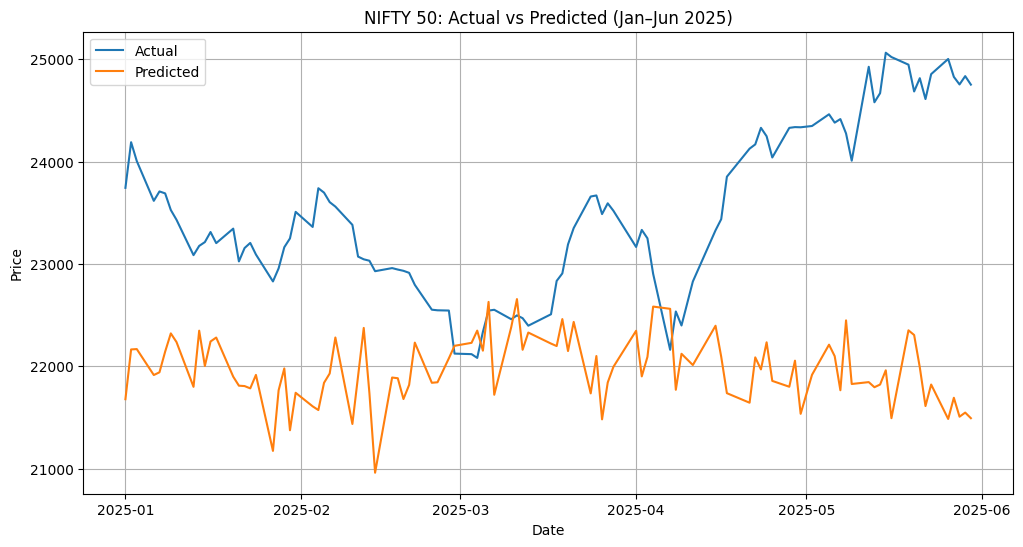

In [11]:
predicted = predicted[:len(dates_2025)]

plt.figure(figsize=(12,6))
plt.plot(dates_2025, actual_2025, label='Actual')
plt.plot(dates_2025, predicted, label='Predicted')
plt.title('NIFTY 50: Actual vs Predicted (Jan–Jun 2025)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# RMSE and MAPE
rmse = np.sqrt(mean_squared_error(actual_2025, predicted))
mape = mean_absolute_percentage_error(actual_2025, predicted) * 100
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

RMSE: 1808.73
MAPE: 6.54%


In [13]:
# Directional Accuracy
pred_dir = np.sign(predicted[1:] - predicted[:-1])
act_dir = np.sign(actual_2025[1:] - actual_2025[:-1])
dir_acc = np.sum(pred_dir == act_dir) / len(pred_dir)
print(f'Directional Accuracy: {dir_acc * 100:.2f}%')

Directional Accuracy: 49.00%
